In [28]:
import random
import networkx
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
#Problem 1

#定义语法内容
grammar = """
sentence = adj noun verb adj noun2
adj = adj_single 和 adj_single 的 | null
adj_single = 漂亮  | 蓝色 | 好看
adv = 安静地 | 静静地
noun = 猫 | 女人 | 男人
verb = adv 看着 | adv 坐着 
noun2 = 桌子 | 皮球 
"""

In [30]:
#code

def build_pattern(grammar):
    grammar_pattern = {}
    for rule in grammar.split("\n"):
        if not rule: 
            continue 
        rule = rule.rstrip()
        key,value = [i.rstrip() for i in rule.split("=")]
        items = [i.rstrip().split() for i in value.split("|")]
        grammar_pattern[key] = items
    return grammar_pattern

grammar_pattern = build_pattern(grammar)
grammar_pattern

{'sentence': [['adj', 'noun', 'verb', 'adj', 'noun2']],
 'adj': [['adj_single', '和', 'adj_single', '的'], ['null']],
 'adj_single': [['漂亮'], ['蓝色'], ['好看']],
 'adv': [['安静地'], ['静静地']],
 'noun': [['猫'], ['女人'], ['男人']],
 'verb': [['adv', '看着'], ['adv', '坐着']],
 'noun2': [['桌子'], ['皮球']]}

In [31]:
def generate_content(pattern, target):
    if (target == "null"):
        return ""
    if target not in pattern:
        return target
    rule = random.choice(pattern[target])
    output = ""
    for token in rule:
        output = output + generate_content(pattern, token)
    return output

setence = generate_content(grammar_pattern, 'sentence')
setence

'好看和好看的猫安静地看着好看和漂亮的桌子'

In [ ]:
#Problem 2

{'A': {'B', 'C'},
 'B': {'A', 'C'},
 'C': {'A', 'B', 'D', 'E'},
 'D': {'C'},
 'E': {'C', 'F'},
 'F': {'E'}}

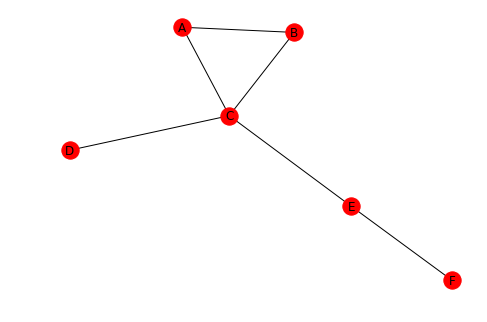

In [37]:
#定义无向图
graph = {
    'A' :'B B B C', 
    'B' : 'A C', 
    'C' : 'A B D E',
    'D' : 'C',
    'E' : 'C F',
    'F' : 'E'
}
for k in graph:
    graph[k] = set(graph[k].split())



#draw it
Graph = networkx.Graph(graph)
networkx.draw(Graph, with_labels=True)
graph

In [56]:
#Breadwidth first
def bfs(start, graph):
    seen = [start]
    visited = []
    queue = [start]
    while(queue):
        point = queue.pop(0)
        print("visit", point)
        visited.append(point)
        neighbors = graph[point]
        for n in neighbors:
            if n not in seen:
                queue.append(n)
                seen.append(n)
        

In [57]:
bfs('A', graph)

visit A
visit B
visit C
visit D
visit E
visit F


In [58]:
#Depth First
def dfs(start, graph):
    seen = [start]
    visited = []
    stack = [start]
    while(stack):
        point = stack.pop()
        print("visit", point)
        visited.append(point)
        neighbors = graph[point]
        for n in neighbors:
            if n not in seen:
                stack.append(n)
                seen.append(n)

In [59]:
dfs('A', graph)

visit A
visit C
visit E
visit F
visit D
visit B


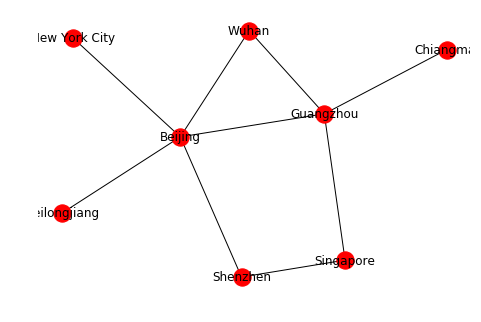

In [60]:
#Problem 3
#Mapping
BJ = 'Beijing'
SZ = 'Shenzhen'
GZ = 'Guangzhou'
WH = 'Wuhan'
HLG = 'Heilongjiang'
NY = 'New York City'
CM = 'Chiangmai'
SG = 'Singapore'
air_route = {
    BJ : {SZ, GZ, WH, HLG, NY}, 
    GZ : {WH, BJ, CM, SG},
    SZ : {BJ, SG},
    WH : {BJ, GZ},
    HLG : {BJ},
    CM : {GZ},
    NY : {BJ}
}
air_route = networkx.Graph(air_route)
networkx.draw(air_route, with_labels=True)

In [68]:
def find_route(route,start,destination):
    paths = [[start]]
    end_with = [start]
    while(paths):
        path = paths.pop(0)
        prev = path[-1]
        neighbors = route[prev]
        for n in neighbors:
            if n not in end_with:
                #print("see",n)
                if n == destination:
                    newpath = path + [n]
                    return newpath
                newpath = path + [n]
                paths.append(newpath)
                end_with.append(n)
    return []

path = find_route(air_route, SZ, WH)
print("->".join(path))
path = find_route(air_route, CM, NY)
print("->".join(path))
path = find_route(air_route, BJ, GZ)
print("->".join(path))

Shenzhen->Beijing->Wuhan
Chiangmai->Guangzhou->Beijing->New York City
Beijing->Guangzhou
